In [ ]:
# importing the libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn import metrics

In [ ]:
# Read CSV file
data = pd.read_csv('aggregated_data_input_for_baseline_models.csv')

In [ ]:
data.head()

,icustay_id,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,200613,36.833333,183.0,5,3,0,1,0,154.0,33.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201171,35.444446,134.0,3,1,0,1,0,113.0,27.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201220,36.111111,90.5,15,1,0,1,1,158.0,31.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201382,36.777776,156.0,15,2,0,1,1,202.0,42.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201829,36.333333,179.0,3,1,0,1,0,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(757, 195)

In [ ]:
data_n = data.drop(['icustay_id'],axis =1)

In [ ]:
data_n.head() 

,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,min bg_pao2fio2ratio,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,36.833333,183.0,5,3,0,1,0,154.0,33.0,308.000000,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.444446,134.0,3,1,0,1,0,113.0,27.0,233.333324,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.111111,90.5,15,1,0,1,1,158.0,31.0,395.000000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.777776,156.0,15,2,0,1,1,202.0,42.0,504.999993,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.333333,179.0,3,1,0,1,0,NaN,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 36.0 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=bd4106df41d19fc87e6fd27f7faf3b77ac41b7a7b81f60e43114f20768fa20d4
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=33be52fdfc101330e0563ba2de14d53a18377e92d82103d98031af8c3761eb54
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
!pip install MICE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
data_imp = MICE().fit_transform(data_n)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_scaler = MinMaxScaler()
data_sc = x_scaler.fit_transform(data_imp)

In [ ]:
data_array = np.array(data_sc)

In [ ]:
data_array.shape

(757, 189)

In [ ]:
# Read CSV file
m = pd.read_csv('mortality_output.csv')

In [ ]:
m = m.drop_duplicates()

In [ ]:
print('Number of survivors: ' + str(m[m['mortality'] == 0].count()['mortality']))
print('Number of non-survivors: ' + str(m[m['mortality'] == 1].count()['mortality']))
print('Mortality: ' + str(round(100*m[m['mortality'] == 1].sum()['mortality'] / len(m.index.unique()),1)) + '%')

Number of survivors: 450
Number of non-survivors: 307
Mortality: 40.6%


In [ ]:
m = m.mortality
m

0      1
1      1
2      1
3      1
4      1
      ..
752    0
753    0
754    0
755    0
756    1
Name: mortality, Length: 757, dtype: int64

In [ ]:
m.shape

(757,)

In [ ]:
m_array = np.array(m)

In [ ]:
m_array.shape

(757,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_array, m_array, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(605, 189)

In [ ]:
y_train.shape

(605,)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred1 = LR.predict(X_test)
pred1_1 = LR.predict_proba(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        90
           1       0.75      0.77      0.76        62

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
auc_score1 = roc_auc_score(y_test, pred1)
print(auc_score1)

0.7982078853046595


**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
DT.fit(X_train, y_train)
pred2 = DT.predict(X_test)
pred2_1 = DT.predict_proba(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        90
           1       0.70      0.61      0.66        62

    accuracy                           0.74       152
   macro avg       0.73      0.72      0.72       152
weighted avg       0.73      0.74      0.73       152



In [ ]:
auc_score2 = roc_auc_score(y_test, pred2)
print(auc_score2)

0.7175627240143369


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
pred3 = RF.predict(X_test)
pred3_1 = RF.predict_proba(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        90
           1       0.75      0.74      0.75        62

    accuracy                           0.80       152
   macro avg       0.79      0.79      0.79       152
weighted avg       0.80      0.80      0.80       152



In [ ]:
auc_score3 = roc_auc_score(y_test, pred3)
print(auc_score3)

0.7876344086021505


**XGboost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=123)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(random_state=123)

In [ ]:
pred4 = xgb.predict(X_test)

In [ ]:
pred4_1 = xgb.predict_proba(X_test)

In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        90
           1       0.70      0.79      0.74        62

    accuracy                           0.78       152
   macro avg       0.77      0.78      0.77       152
weighted avg       0.78      0.78      0.78       152



In [ ]:
auc_score4 = roc_auc_score(y_test, pred4)
print(auc_score4)

0.7784946236559138


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred1_1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred2_1[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred3_1[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred4_1[:,1], pos_label=1)


In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

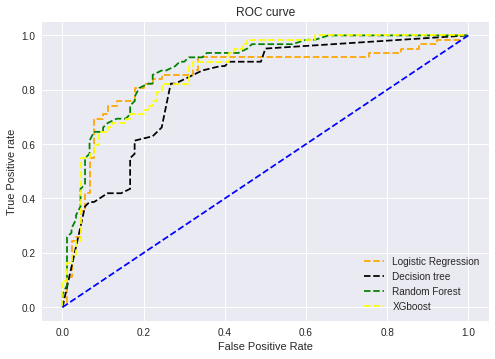

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='Decision tree')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='XGboost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.3 MB/s 


In [ ]:
import shap